In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
window = 243

# 持仓盈亏与盈亏占比

In [44]:
df = pd.read_excel('D:/workspace/zjsxzy_in_js/website/everyday-update/data/881001.WI.xlsx')

In [45]:
df.tail()

,turnover days,current return,profit percentage
2018-10-18,83.795689,-0.209524,0.049393
2018-10-19,83.876138,-0.189414,0.106382
2018-10-22,83.478749,-0.145241,0.204172
2018-10-23,83.345173,-0.151976,0.170641
2018-10-24,83.363692,-0.147392,0.178378


In [46]:
df = df[df.index >= '2013-01-01']

# 加权回购期限

In [47]:
repo = pd.read_excel('D:/Data/risk/weighted_repo.xlsx')

In [48]:
# repo.tail()

# 股票流动性风险

In [49]:
st_li = pd.read_excel('D:/workspace/zjsxzy_in_js/website/everyday-update/data/amihud_liquidity.xlsx')

In [50]:
# st_li.tail()

In [51]:
st_li['z'] = st_li['wdqa_corwin and schultz'].rolling(window).apply(lambda x: (x[-1] - x.mean()) / x.std())

In [52]:
st_li.loc[st_li['z'].abs() < 2, 'z'] = 0

In [53]:
st_li.tail()

,sz50_amihud,sz50_corwin and schultz,sz50_wu,sz_roll,wdqa_amihud,wdqa_wu,wdqa_corwin and schultz,wdqa_roll,hs300_amihud,hs300_wu,...,zz800_roll,zxb_amihud,zxb_wu,zxb_corwin and schultz,zxb_roll,cyb_amihud,cyb_wu,cyb_corwin and schultz,cyb_roll,z
2018-10-18,0.001314,0.000848,5.184003,0.012851,0.023346,3.706557,0.003269,0.016458,0.003358,3.673625,...,0.015270,0.005052,2.278305,0.002723,0.016897,0.004698,2.442104,0.005651,0.016815,0.000000
2018-10-19,0.001298,0.005952,4.937452,0.014057,0.013185,2.300112,0.004508,0.016834,0.002782,3.340526,...,0.015657,0.003918,1.970763,0.010905,0.017649,0.004306,2.321785,0.014342,0.017125,0.000000
2018-10-22,0.001119,0.067827,3.913152,0.013734,0.019015,3.084211,0.070624,0.016365,0.003253,3.678144,...,0.015502,0.004137,1.970292,0.077788,0.016983,0.003430,2.501300,0.072629,0.017408,6.466399
2018-10-23,0.000524,0.001034,2.679767,0.015366,0.009551,1.628831,0.008149,0.016857,0.001782,2.229596,...,0.015940,0.002425,1.234977,0.015140,0.017342,0.001887,1.489376,0.011443,0.017597,0.000000
2018-10-24,0.000314,0.013656,1.682581,0.016947,0.006956,1.059584,0.007367,0.016934,0.001040,1.277346,...,0.016167,0.001316,0.783530,0.007577,0.017390,0.001225,0.825881,0.002208,0.017139,0.000000


# 人民币资产和全球资产系统性风险

In [54]:
risk = pd.read_excel('D:/Data/risk/systematic.xlsx')

In [55]:
risk.tail()

,China,Global
2018-10-18,0.859007,0.899673
2018-10-19,0.857835,0.899860
2018-10-22,0.856987,0.899917
2018-10-23,0.855523,0.900111
2018-10-24,0.854157,0.899986


In [56]:
risk['China z'] = risk['China'].rolling(window).apply(lambda x: (x[-1] - x.mean()) / x.std())
risk['Global z'] = risk['Global'].rolling(window).apply(lambda x: (x[-1] - x.mean()) / x.std())

# 股债相对收益率

In [57]:
eyby = pd.read_excel('D:/workspace/zjsxzy_in_js/website/everyday-update/data/EYBY.xlsx')

In [58]:
eyby.tail()

,pe_ttm,ytm_b,close
2018-10-18,13.1000,4.1066,3179.5353
2018-10-19,13.4396,4.1023,3263.7825
2018-10-22,13.9933,4.1088,3412.7501
2018-10-23,13.6738,4.1029,3340.4615
2018-10-24,13.6998,4.0875,3343.1078


In [59]:
eyby = eyby.dropna()

In [60]:
eyby['spread'] = ((100. / eyby['pe_ttm']) - eyby['ytm_b']).rolling(window=5).mean()
eyby['spread'] = eyby['spread'] / 100

In [61]:
eyby['z'] = eyby['spread'].rolling(window=window).apply(lambda x: (x[-1] - x.mean()) / x.std())

# 市场一致度

In [62]:
cons = pd.read_excel('D:/workspace/zjsxzy_in_js/website/everyday-update/data/consistency.xlsx', index_col=0)

In [63]:
cons.tail()

,con60
date,
2018-10-18,0.876957
2018-10-19,0.881188
2018-10-22,0.894859
2018-10-23,0.894827
2018-10-24,0.893007


In [64]:
cons = cons[cons.index >= '2005-01-01']

In [65]:
cons['z'] = cons['con60'].rolling(window=window).apply(lambda x: (x[-1] - x.mean()) / x.std())

# 债券流动性

In [66]:
bo_li = pd.read_excel('D:/Data/risk/bond_liquidity.xlsx', index_col=0)

In [67]:
bo_li.tail()

,ILLIQUIDITY
TRADINGDAY,
2018-10-18,1.496245
2018-10-19,1.592475
2018-10-22,1.165542
2018-10-23,1.256748
2018-10-24,0.815459


In [68]:
bo_li['z'] = bo_li['ILLIQUIDITY'].rolling(window=window).apply(lambda x: (x[-1] - x.mean()) / x.std())

In [69]:
bo_li.loc[bo_li['z'].abs() < 2, 'z'] = 0

# 点击量数据

In [70]:
click = pd.read_excel(u'D:/Data/risk/点击量数据.xlsx')

In [71]:
click.tail()

,Date,Page Clicks,# of Users
1487,2018-10-18,2801008.0,834626.0
1488,2018-10-19,2819385.0,788511.0
1489,2018-10-22,3316930.0,942521.0
1490,2018-10-23,2933565.0,825684.0
1491,2018-10-24,2718604.0,762896.0


In [72]:
click = click.set_index('Date')

In [73]:
click['click'] = click['Page Clicks'].rolling(20).mean()

In [74]:
click['z'] = click['click'].rolling(window).apply(lambda x: (x[-1] - x.mean()) / x.std())

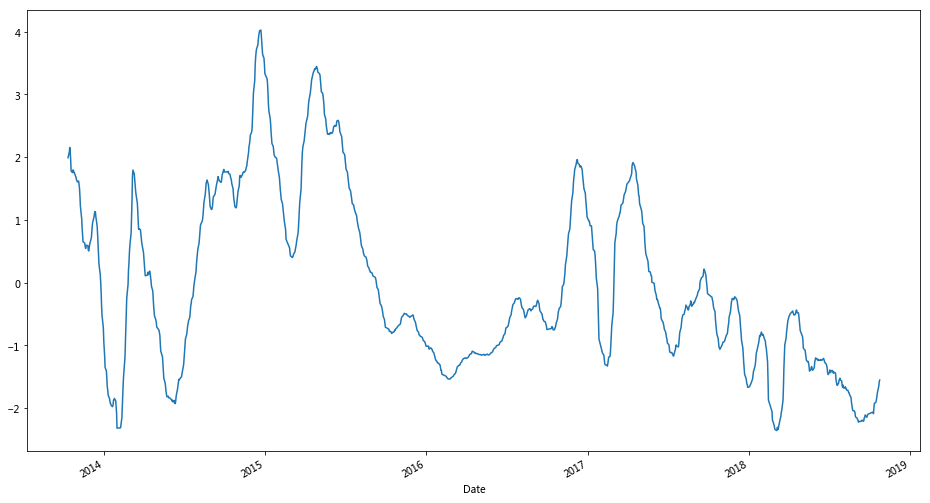

In [75]:
click['z'].plot(figsize=(16, 9))

# 美欧经济意外指数之差

In [76]:
us_eu = pd.read_excel('D:/Data/macro/us/econ_accident.xlsx')

In [77]:
us_eu['diff'] = us_eu['us econ ac'] - us_eu['eu econ ac']

# 铜油比

In [78]:
cop = pd.read_excel(u'D:/Data/industry/metal/LME铜三个月期货价格.xlsx')
oil = pd.read_excel(u'D:/Data/industry/metal/Brent油价.xlsx')

In [79]:
cop_oil_ratio = (cop[cop.columns[0]] / oil[oil.columns[0]]).dropna()

In [80]:
cop_oil_z = cop_oil_ratio.rolling(window).apply(lambda x: (x[-1] - x.mean()) / x.std())

# 画图

Text(0.5,1,u'\u94dc\u6cb9\u6bd4')

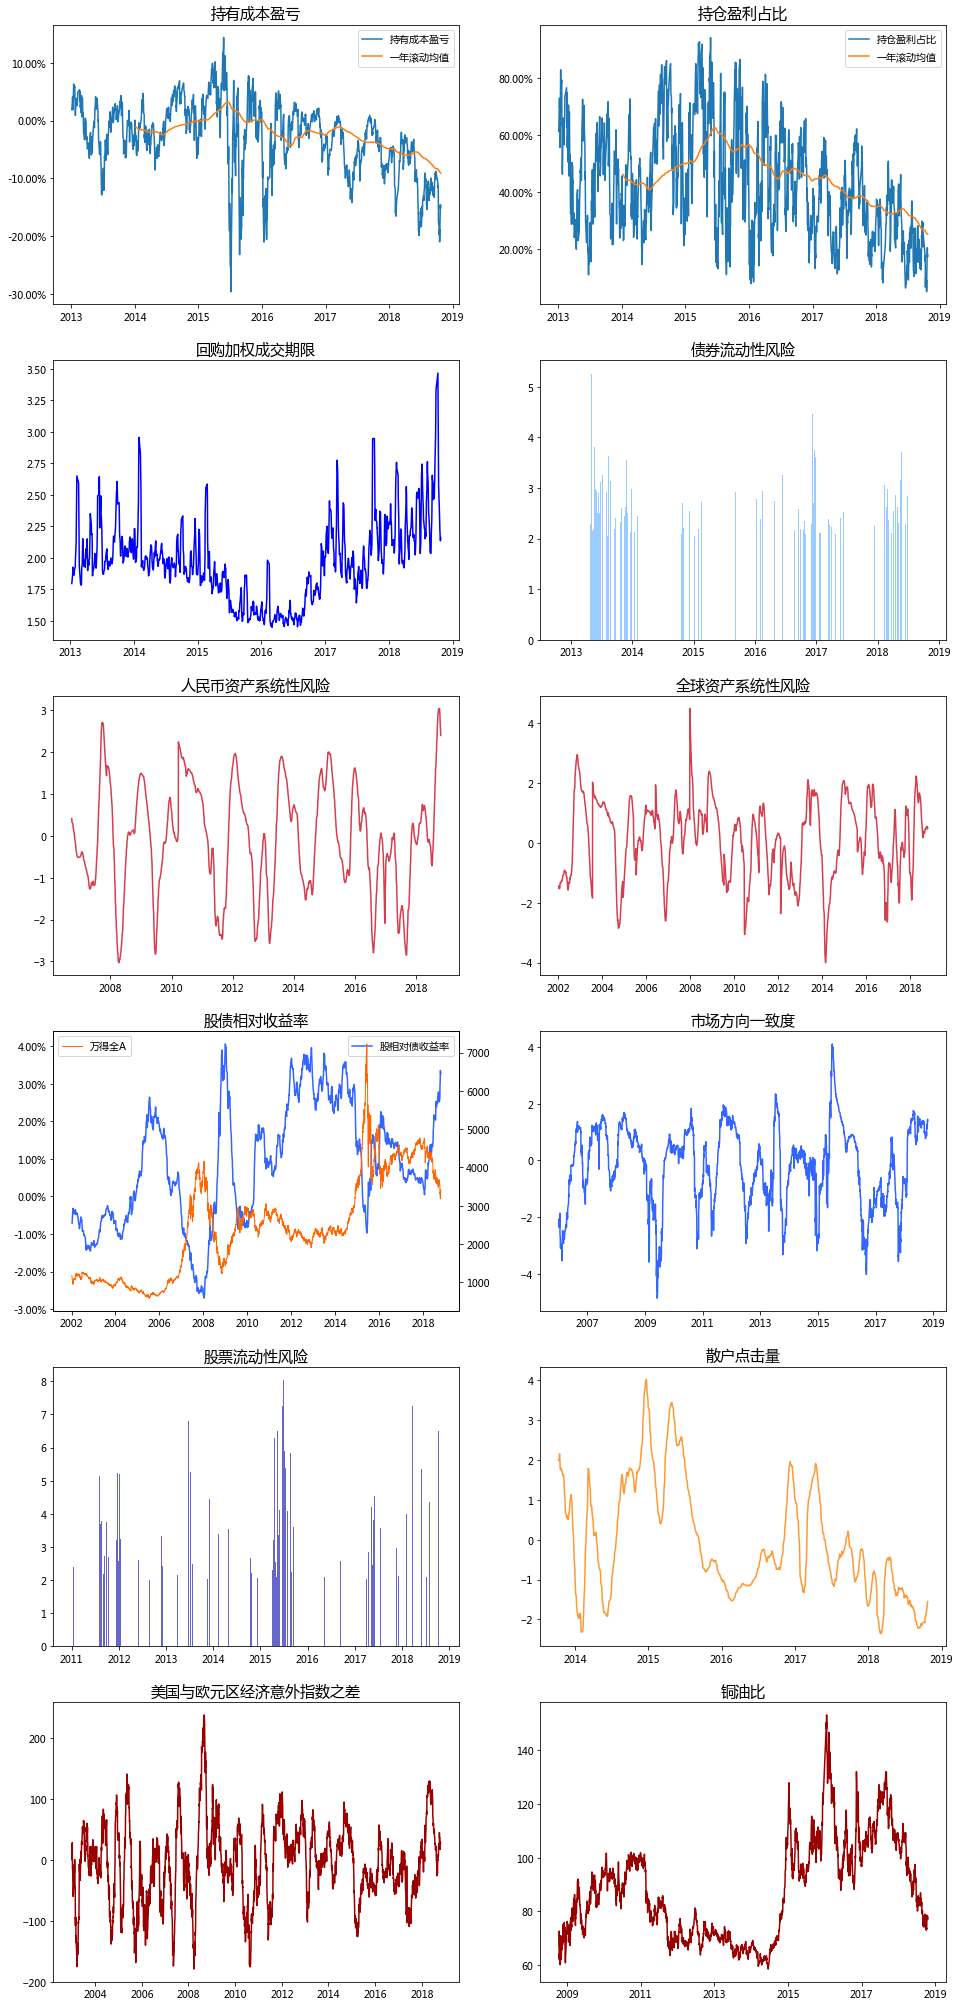

In [81]:
fig = plt.figure(figsize=(16, 36))
row = 6

ax1 = fig.add_subplot(row, 2, 1)
ax1.plot(df.index, df['current return'], label=u'持有成本盈亏')
ax1.plot(df.index, df['current return'].rolling(window=243).mean(), label=u'一年滚动均值')
ax1.legend()
ax1.set_title(u'持有成本盈亏', fontsize=15)
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

ax2 = fig.add_subplot(row, 2, 2)
ax2.plot(df.index, df['profit percentage'], label=u'持仓盈利占比')
ax2.plot(df.index, df['profit percentage'].rolling(window=243).mean(), label=u'一年滚动均值')
ax2.legend()
ax2.set_title(u'持仓盈利占比', fontsize=15)
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

ax3 = fig.add_subplot(row, 2, 3)
ax3.plot(repo.index, repo['rolling mean'], c='blue')
ax3.set_title(u'回购加权成交期限', fontsize=15)

ax4 = fig.add_subplot(row, 2, 4)
ax4.bar(bo_li.index, bo_li['z'].abs(), color='#99CCFF', width=5)
ax4.set_title(u'债券流动性风险', fontsize=15)

ax5 = fig.add_subplot(row, 2, 5)
ax5.plot(risk.index, risk['China z'], c='#D53E4F')
ax5.set_title(u'人民币资产系统性风险', fontsize=15)

ax6 = fig.add_subplot(row, 2, 6)
ax6.plot(risk.index, risk['Global z'], c='#D53E4F')
ax6.set_title(u'全球资产系统性风险', fontsize=15)

ax7 = fig.add_subplot(row, 2, 7)
ax7.plot(eyby.index, eyby['spread'], label=u'股相对债收益率', c='#3366FF')
ax7.legend()
vals = ax7.get_yticks()
ax7.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
ax77 = ax7.twinx()
ax77.plot(eyby.index, eyby['close'], label=u'万得全A', color='#FF6600', linewidth=1)
ax77.legend(loc='upper left')
ax7.set_title(u'股债相对收益率', fontsize=15)

ax8 = fig.add_subplot(row, 2, 8)
ax8.plot(cons.index, cons['z'], c='#3366FF')
ax8.set_title(u'市场方向一致度', fontsize=15)

ax9 = fig.add_subplot(row, 2, 9)
ax9.bar(st_li.index, st_li['z'].abs(), color='#6666CC', width=5)
ax9.set_title(u'股票流动性风险', fontsize=15)

ax10 = fig.add_subplot(row, 2, 10)
ax10.plot(click.index, click['z'], c='#FF9933')
ax10.set_title(u'散户点击量', fontsize=15)

ax11 = fig.add_subplot(row, 2, 11)
ax11.plot(us_eu['diff'], color='#990000')
ax11.set_title(u'美国与欧元区经济意外指数之差', fontsize=15)

ax12 = fig.add_subplot(row, 2, 12)
ax12.plot(cop_oil_ratio, color='#990000')
ax12.set_title(u'铜油比', fontsize=15)

In [82]:
fig.savefig('plot.png', dpi=200, bbox_inches='tight')